## HỒI QUY TUYẾN TÍNH

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Data/iris_setosa.csv')
data.head()

,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


In [15]:
X = data.iloc[:,0]
Y = data.iloc[:,1]

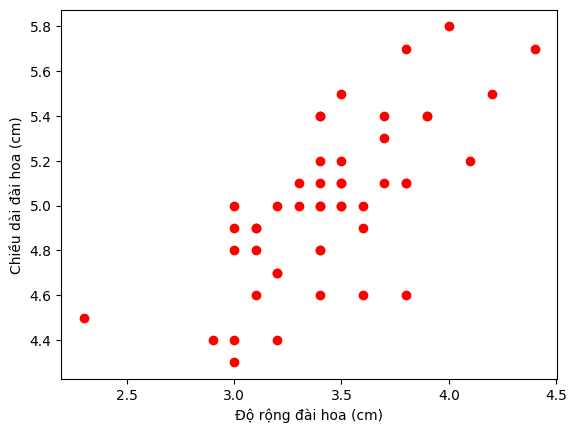

In [16]:
plt.scatter(X,Y,marker = 'o',color = 'red')
plt.xlabel('Độ rộng đài hoa (cm)')
plt.ylabel('Chiều dài đài hoa (cm)')
plt.show()

In [17]:
# Building the model
m = 0
c = 0

# Tune this params to see how it changes
# alpha - hệ số training
alpha = 0.001
# epochs - số lần huấn luyện, số bước chạy
epochs = 10000

n = float(len(X))
for i in range(epochs):
    # Tính giá trị dự đoán
    y_pred = m*X + c
    # Tính đạo hàm từng phần
    D_m = (-2/n)*sum(X*(Y - y_pred))
    D_c = (-2/n)*sum(Y - y_pred)
    # Cập nhật lại m c
    m = m-alpha*D_m
    c = c-alpha*D_c

print(m,c)

1.203817243388855 0.8445882587551496


In [18]:
print(f'The linear model is: \n Y = {c} + {m}*X')

The linear model is: 
 Y = 0.8445882587551496 + 1.203817243388855*X


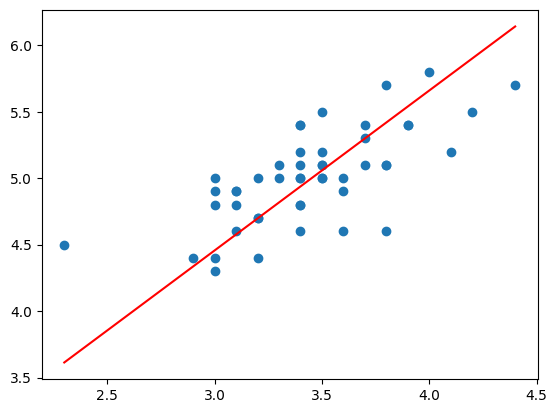

In [19]:
y_pred = m*X+c

# Điểm thực tế
plt.scatter(X,Y)
# Điểm dự đoán
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color = 'red')
plt.show()

In [20]:
x = float(input('Nhập độ rộng của đài hoa: '))

y = x*m+c
print(f'Chiều dài của đài hoa là {y}')

Chiều dài của đài hoa là 5.057948610616142


In [30]:
# Sử dụng thư viện
X = data.iloc[:,0]
Y = data.iloc[:,1]

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X.values.reshape(-1,1),Y.ravel())

LinearRegression()

In [23]:
print(f'The linear model is: \n Y = {model.intercept_} + {model.coef_[0]}*X')

The linear model is: 
 Y = 2.7330186365865625 + 0.661108386463953*X


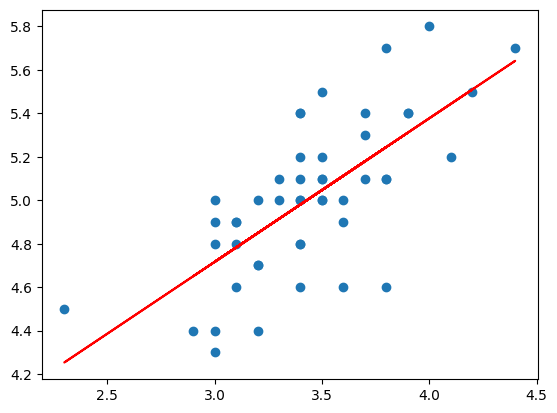

In [24]:
ppredictions = model.predict(X.values.reshape(-1,1))
plt.scatter(X,Y)
plt.plot(X,ppredictions,color = 'red')
plt.show()

In [25]:
# x = float(input('Nhập độ rộng của đài hoa: '))

# y = model.predict([[x]])
# print(f'Chiều dài của đài hoa là {y}')

<b>Đánh giá mô hình</b>

In [26]:
model.score(X.values.reshape(-1,1),Y)

0.4920895112939857

In [29]:
import statsmodels.api as sm
X = data['X'].values.reshape(-1,1)
Y = data['Y']
exog = sm.add_constant(X)
estimator = sm.OLS(Y,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     44.57
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.80e-08
Time:                        21:16:44   Log-Likelihood:                -2.0899
No. Observations:                  48   AIC:                             8.180
Df Residuals:                      46   BIC:                             11.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7330      0.343      7.971      0.0

### Hồi quy tuyến tính đa biến

In [31]:
data = pd.read_csv('Data/exams.csv')
data.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [32]:
X = data.iloc[:,:-1].values.reshape(-1,3)
y = data.iloc[:,-1]

In [33]:
m_model = LinearRegression()
m_model.fit(X,y.ravel())

LinearRegression()

In [34]:
print (f'The linear model is: \n Y = {m_model.intercept_} + {m_model.coef_[0]}*X1\
+ {m_model.coef_[1]}*X2+ {m_model.coef_[2]}*X3')

The linear model is: 
 Y = -4.3361024012403675 + 0.35593821866182124*X1+ 0.5425187576187045*X2+ 1.1674442162822212*X3


In [35]:
exam1 = float(input('Lần 1: '))
exam2 = float(input('Lần 2: '))
exam3 = float(input('Lần 3: '))
final = m_model.intercept_ + m_model.coef_[0]*exam1 + m_model.coef_[1]*exam2+ m_model.coef_[2]*exam3
print(final)

150.60648704096565


: 